# Fastdup: An Underated Tool to Manage, Clean & Curate Visual Data at Scale on a Single CPU - For Free.

<a href="https://colab.research.google.com/github/dnth/fastdup-manage-clean-curate-blogpost/blob/master/clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastdup==0.189

## Running Fastdup to check for data issues.

In [11]:
import os
from IPython.display import HTML
import fastdup
fastdup.__version__

'0.189'

In [25]:
fastdup.run(input_dir='scene_classification_clean/data/', work_dir="scene_classification_clean/report/")

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
On Jupyter notebook running on large datasets, there may be delay getting the console output
A recommended way to fixing this is to run: 
%pip install wurlitzer
%load_ext wurlitzer

Going to loop over dir scene_classification_clean/data
Found total 16854 images to run on
Found total 16854 images to run on■■■■■■■■■■■■■■■■■] 100% Estimated: 0 Minutes 0 Features
2651) Finished write_index() NN model
Stored nn model index file scene_classification_clean/report/nnf.index
Total time took 41191 ms
Found a total of 0 fully identical images (d>0.990), which are 0.00 %
Found a total of 0 nearly identical images(d>0.980), which are 0.00 %
Found a total of 7060 above threshold images (d>0.900), which are 13.96 %
Found a total of 1685 outlier images         (d<0.050), which are 3.33 %
Min distance found 0.600 max distance 0.969
Running connected components for ccthreshold 0.960000 hierarchy? 0 
.0

0

## 🧑‍🤝‍🧑 Duplicates

{'hierarchical_run': False, 'hierarchical_threshold': 'similarity'}


100%|██████████| 50/50 [00:00<00:00, 271.89it/s]


Stored similarity visual view in  scene_classification_clean/report/similarity.html



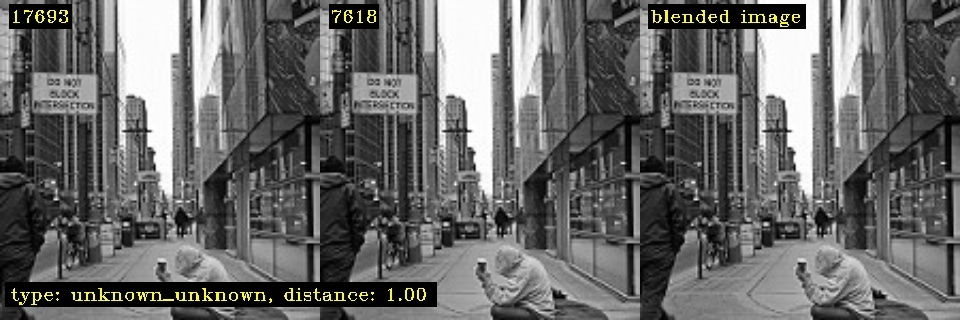
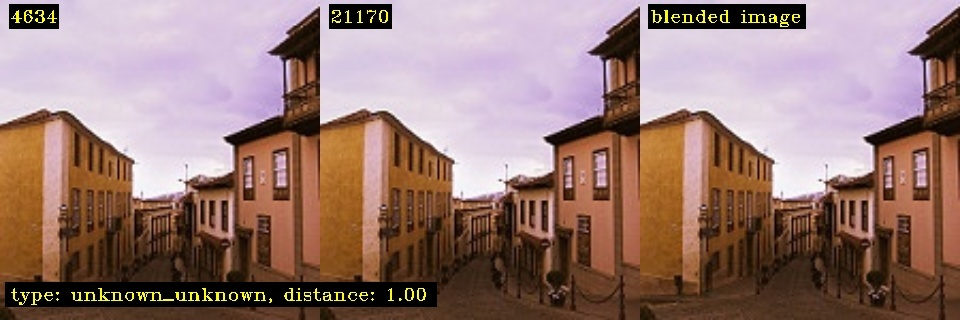
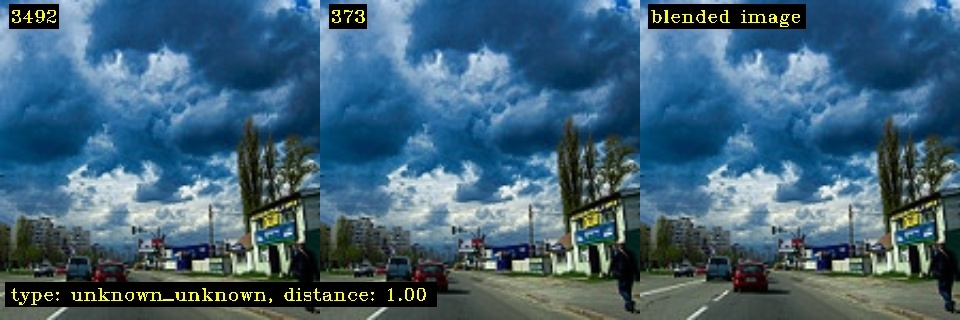
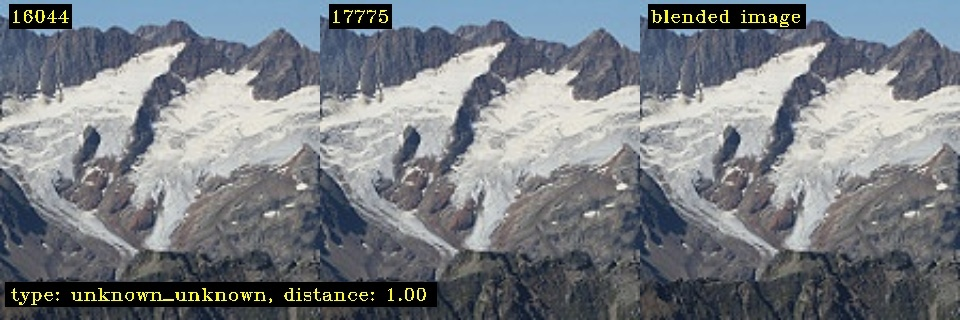
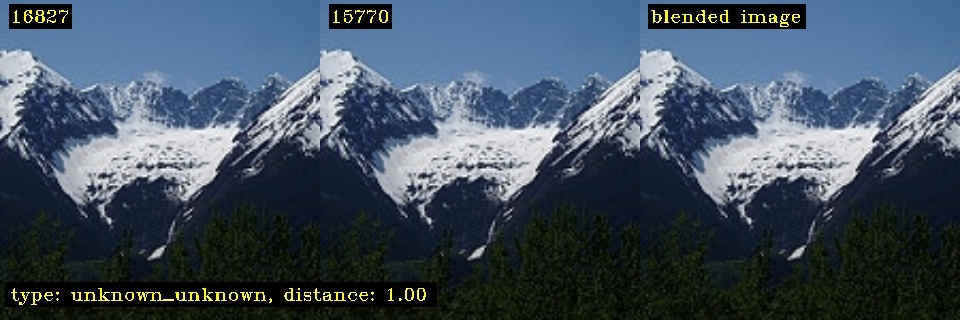
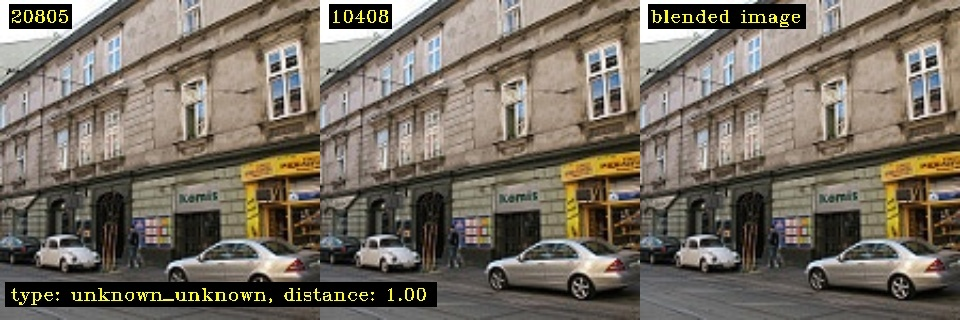
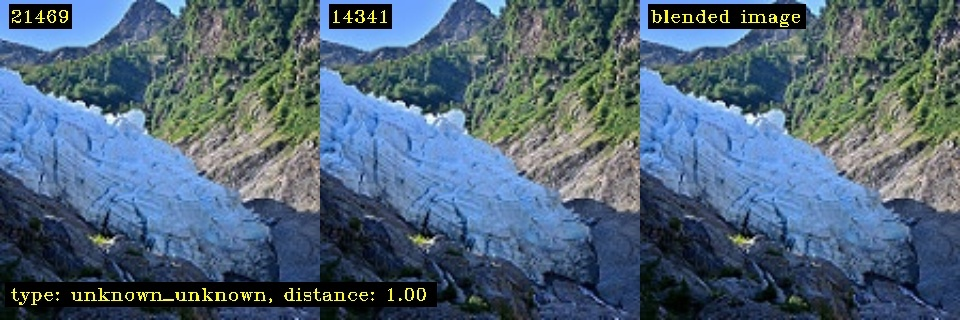
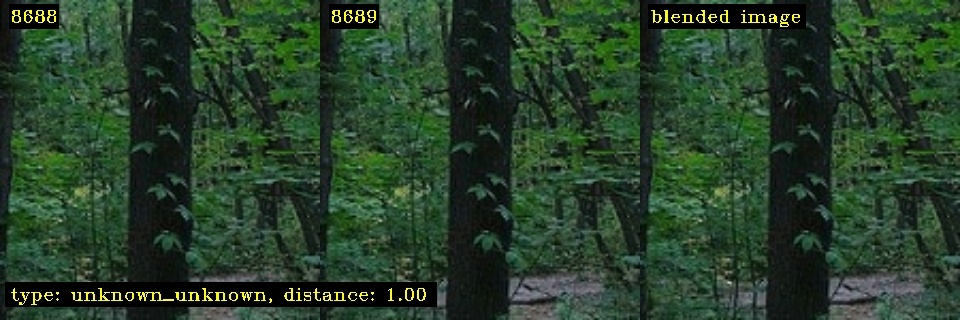
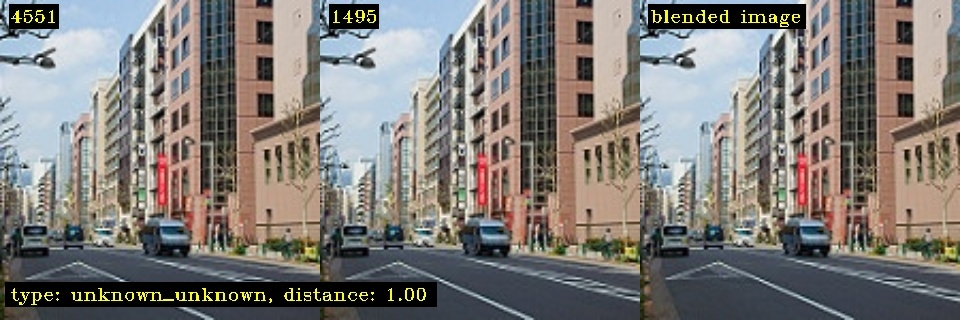
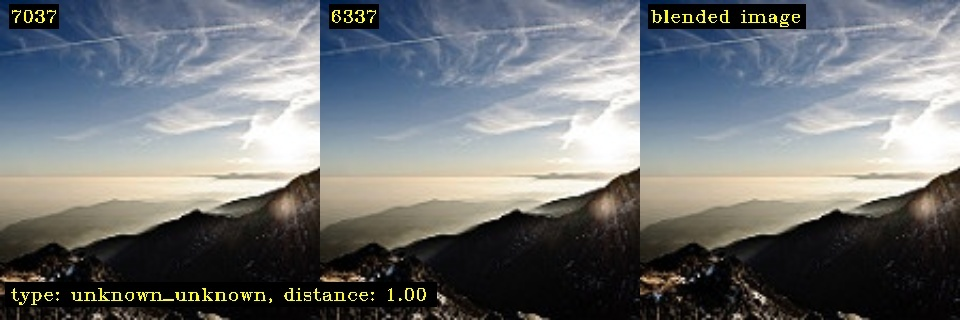
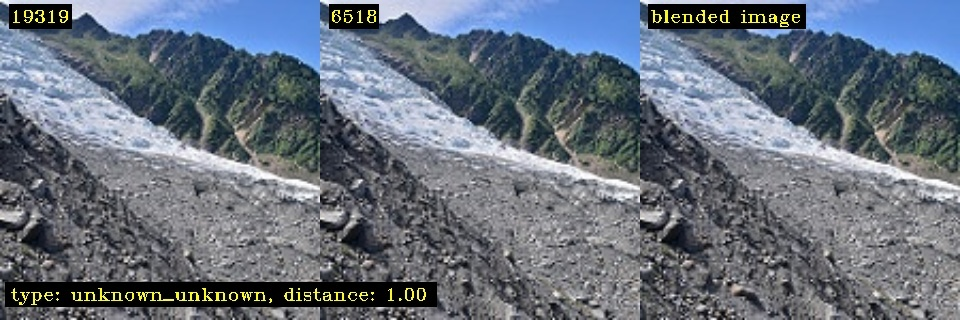
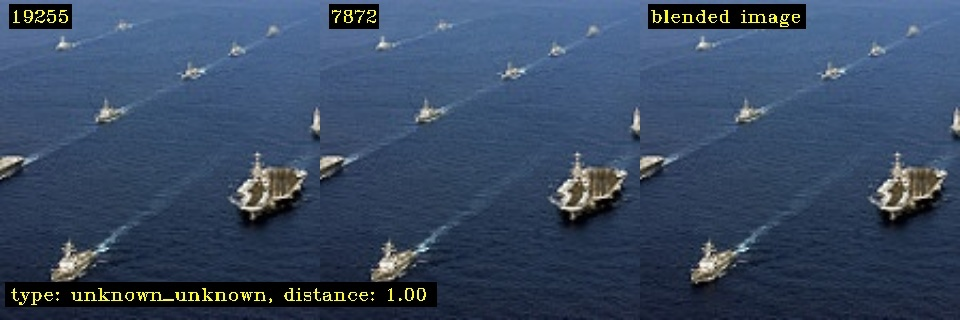
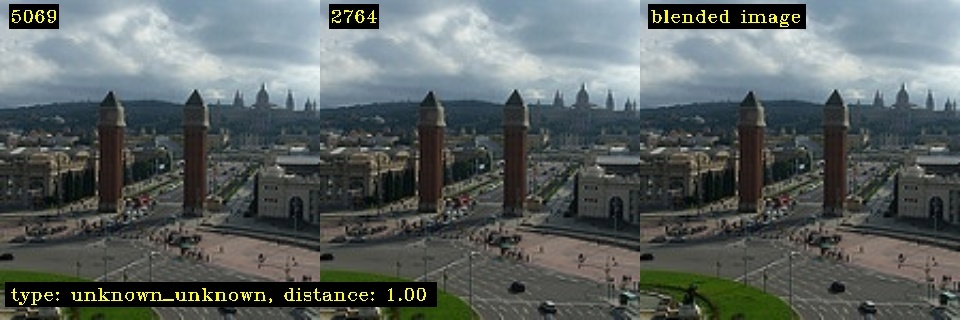
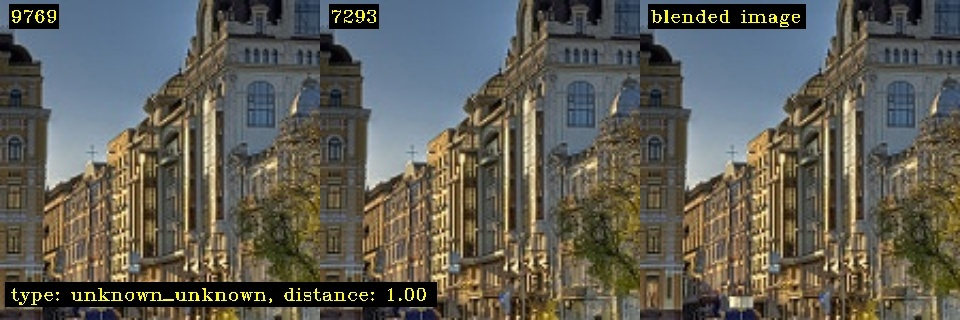
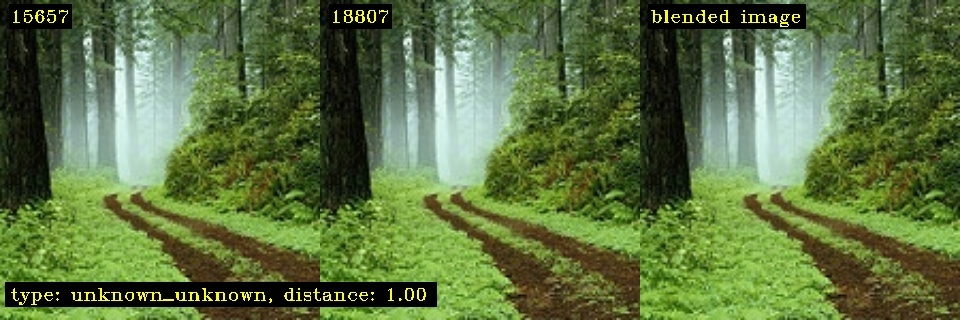
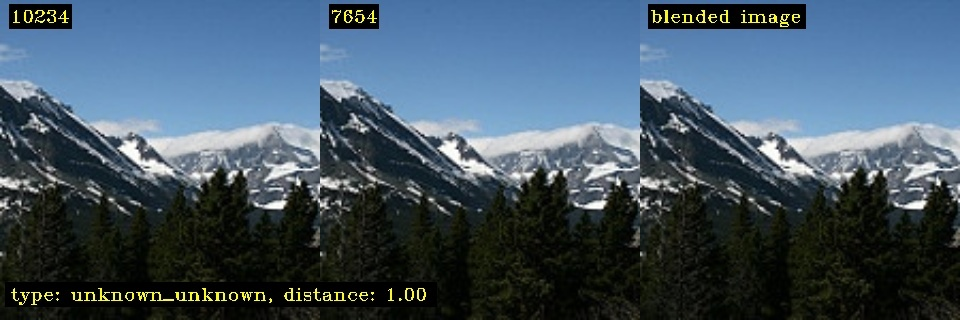
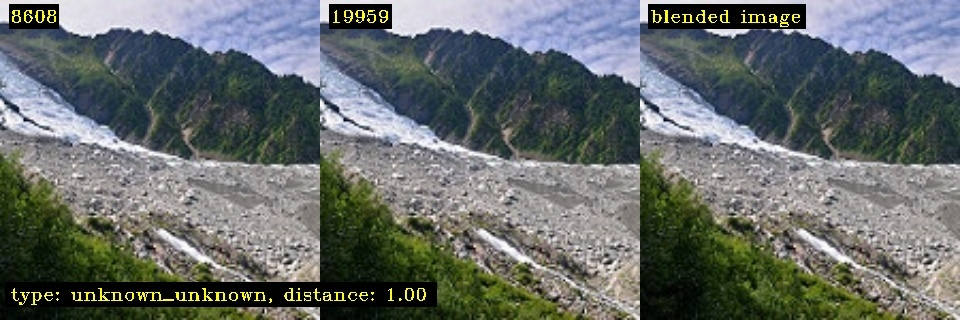
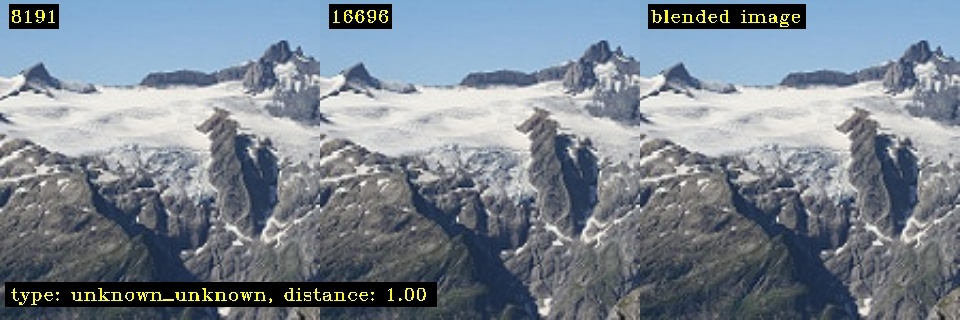
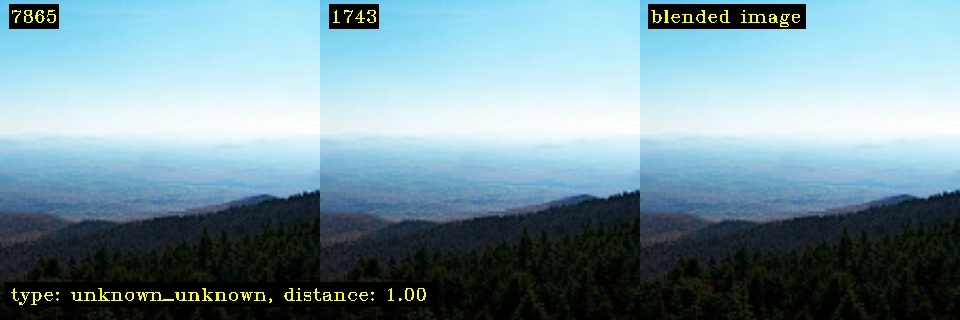
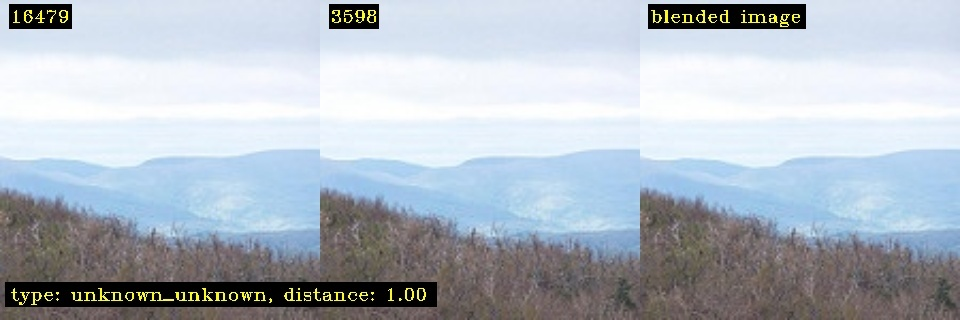
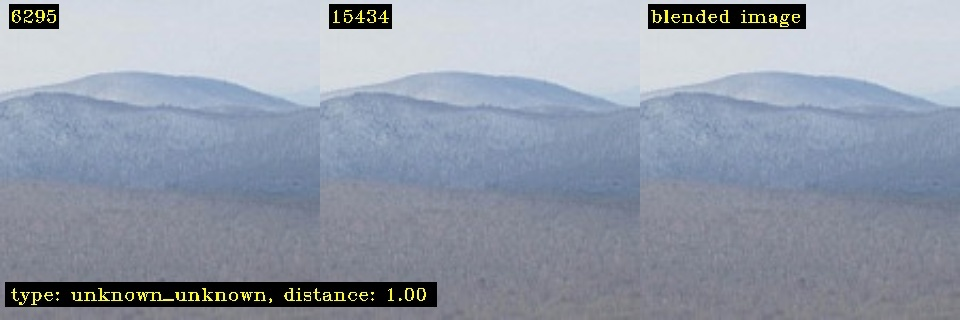
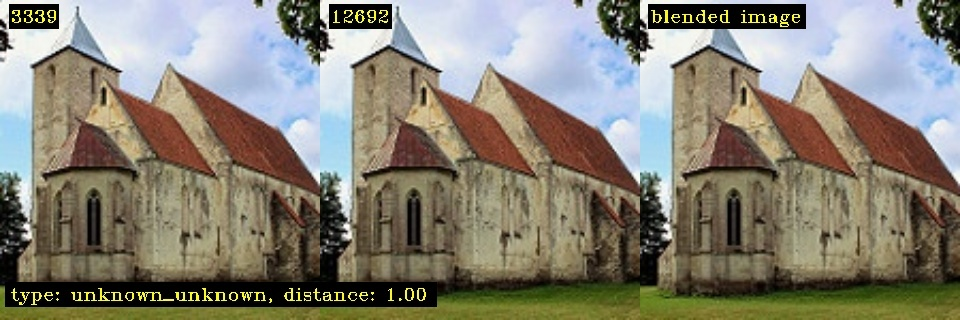
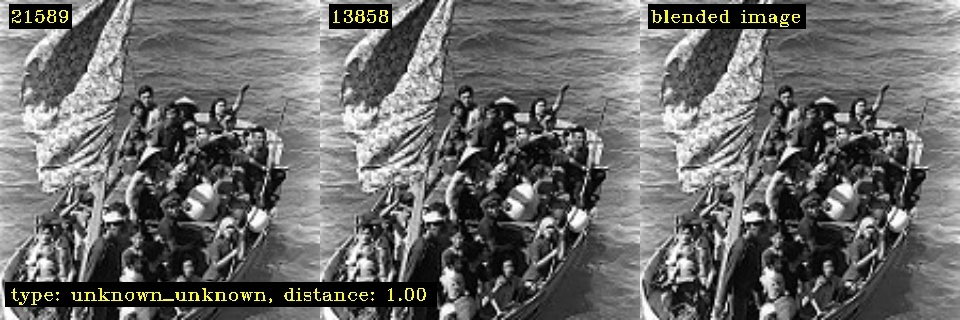
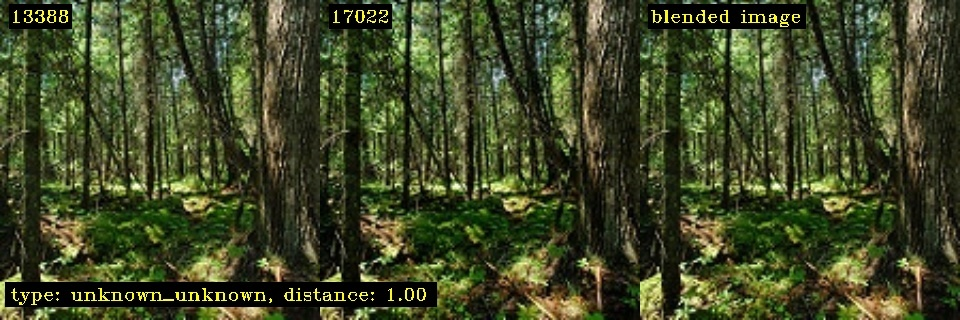
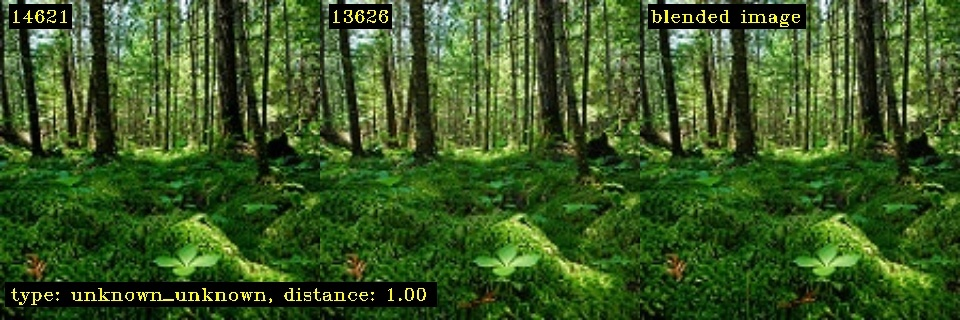
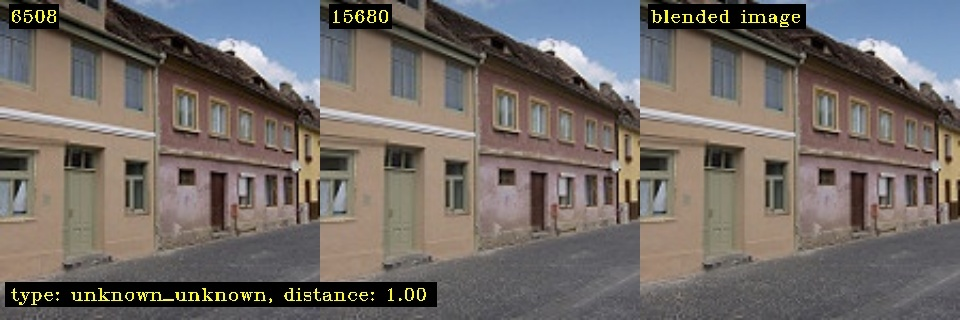
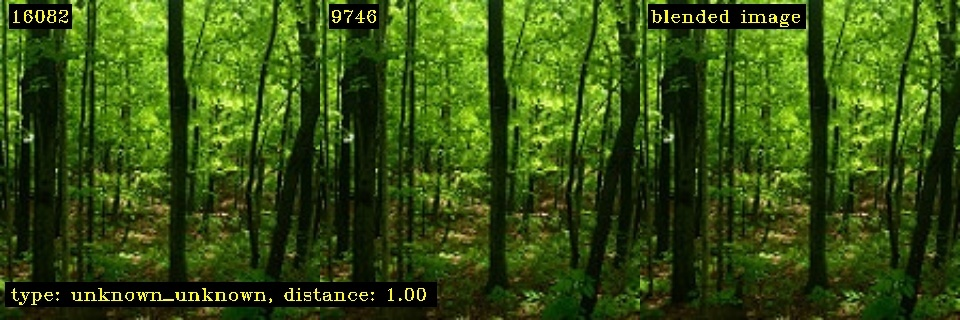
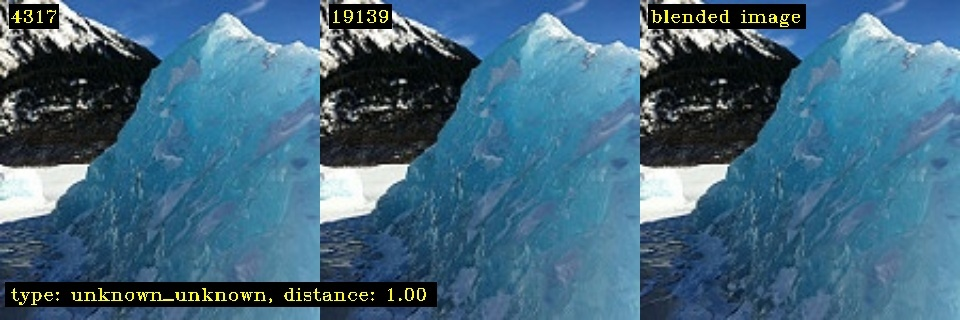
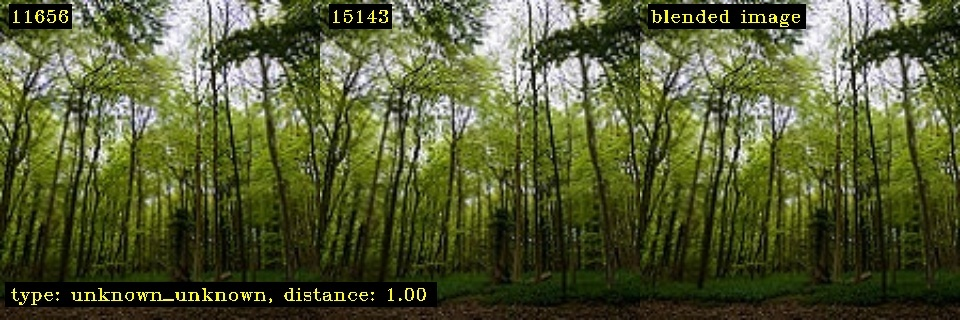
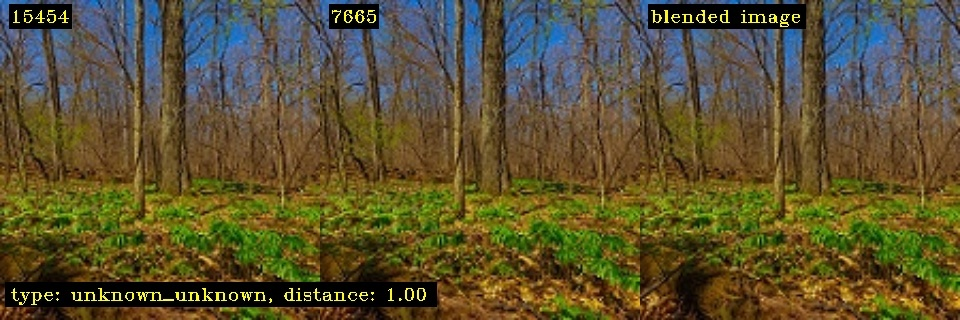
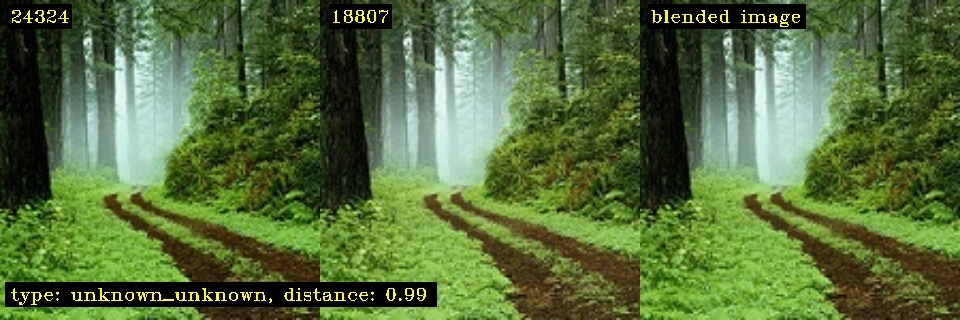
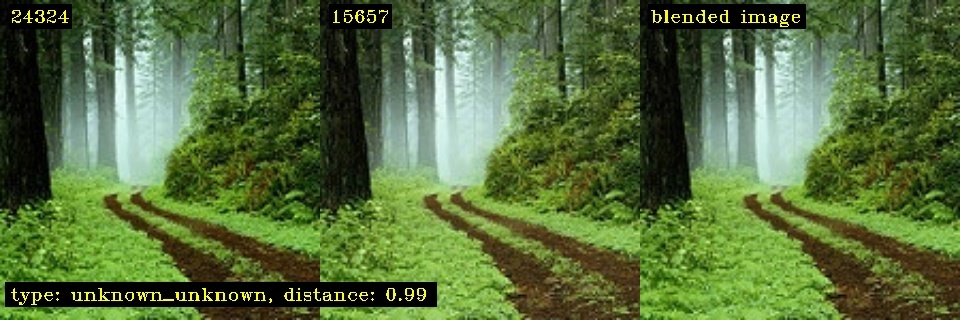
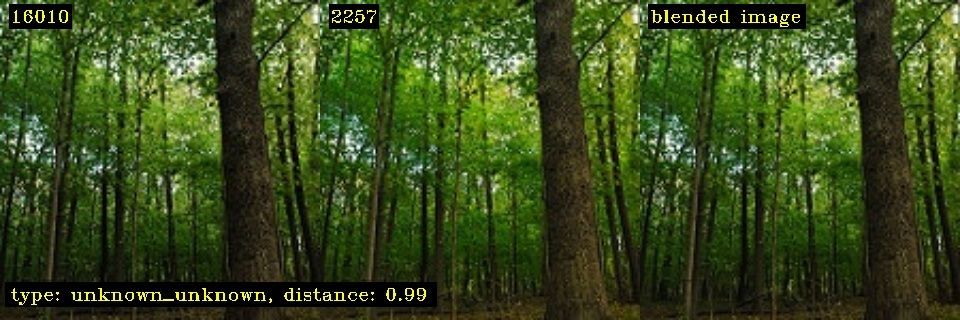
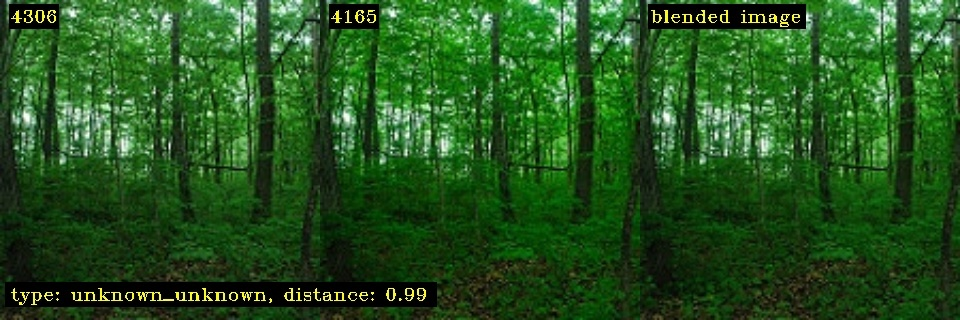

In [13]:
fastdup.create_duplicates_gallery(similarity_file='scene_classification_clean/report/similarity.csv', save_path='scene_classification_clean/report/', num_images=50)
HTML('scene_classification_clean/report/similarity.html')

In [15]:
top_components = fastdup.find_top_components(work_dir="scene_classification_clean/report/")
fastdup.delete_components(top_components, None, how='one', dry_run=False)

total deleted 5 files
total deleted 4 files
total deleted 3 files
total deleted 3 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 2 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total deleted 1 files
total dele

['scene_classification_clean/data/glacier/10412.jpg',
 'scene_classification_clean/data/glacier/13300.jpg',
 'scene_classification_clean/data/glacier/1639.jpg',
 'scene_classification_clean/data/glacier/17845.jpg',
 'scene_classification_clean/data/glacier/24060.jpg',
 'scene_classification_clean/data/glacier/21060.jpg',
 'scene_classification_clean/data/glacier/22254.jpg',
 'scene_classification_clean/data/glacier/5505.jpg',
 'scene_classification_clean/data/glacier/7861.jpg',
 'scene_classification_clean/data/glacier/5634.jpg',
 'scene_classification_clean/data/glacier/5688.jpg',
 'scene_classification_clean/data/glacier/5821.jpg',
 'scene_classification_clean/data/mountain/1956.jpg',
 'scene_classification_clean/data/mountain/23117.jpg',
 'scene_classification_clean/data/mountain/5828.jpg',
 'scene_classification_clean/data/glacier/3647.jpg',
 'scene_classification_clean/data/glacier/855.jpg',
 'scene_classification_clean/data/mountain/10566.jpg',
 'scene_classification_clean/data/m

## 🦄 Anomalies

100%|██████████| 50/50 [00:00<00:00, 20679.93it/s]


Stored outliers visual view in  scene_classification_clean/report/outliers.html



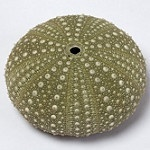
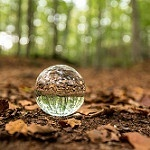
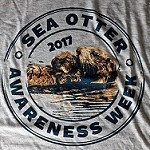
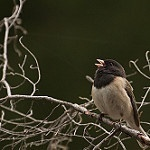
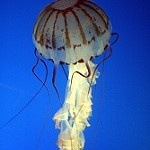
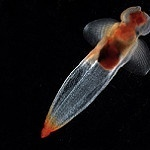
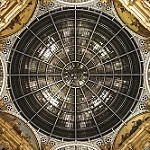
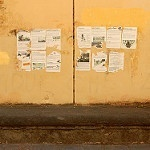
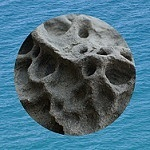
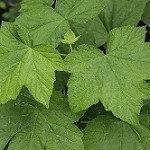
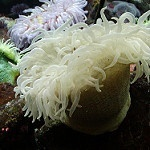
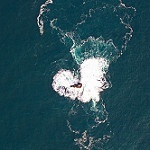
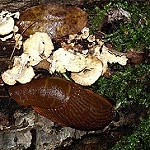
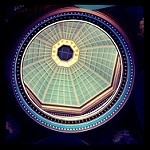
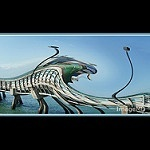
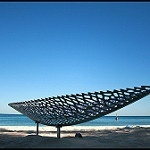
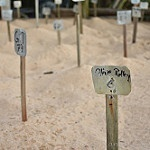
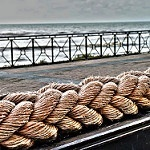
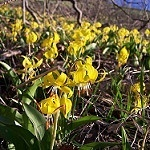
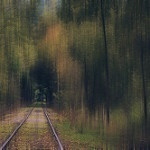
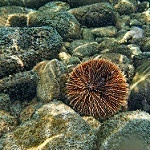
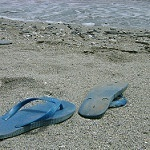
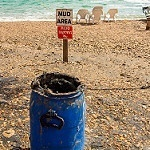
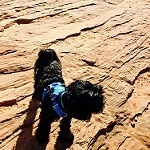
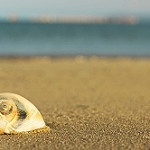
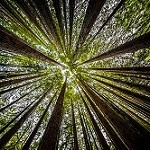
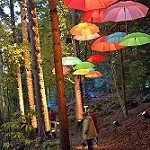
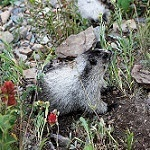
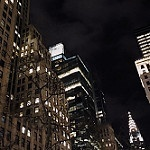
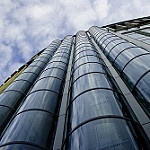
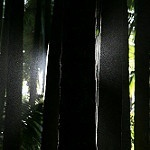
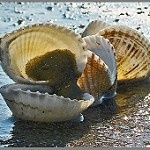
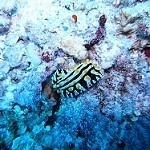
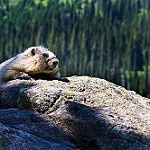
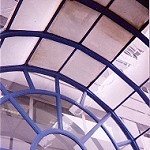
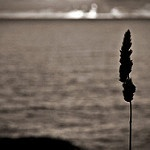
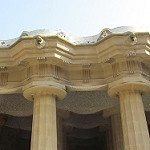
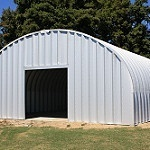
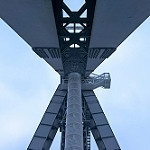
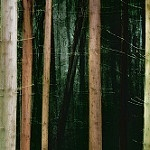
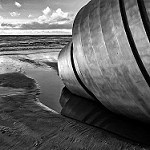
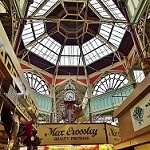
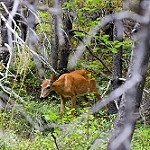
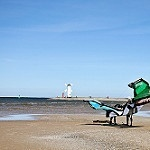
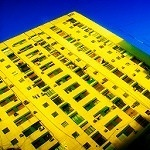
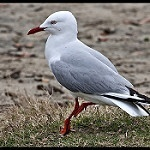
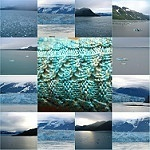
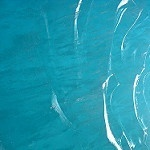
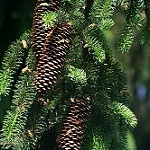
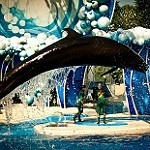

In [26]:
fastdup.create_outliers_gallery(outliers_file='scene_classification_clean/report/outliers.csv', save_path='scene_classification_clean/report', num_images=50)
HTML('scene_classification_clean/report/outliers.html')

In [29]:
fastdup.delete_or_retag_stats_outliers(stats_file="scene_classification_clean/report/outliers.csv", metric='distance', filename_col='from', lower_threshold=0.6, dry_run=True)

Going to delete any images with distance < 0.6
Did not find any items to delete, please check your selection


0

## 💆 Wrong or Confusing Labels

100%|██████████| 20/20 [00:00<00:00, 258.20it/s]


Stored similar images view in  scene_classification_clean/report/topk_similarity.html



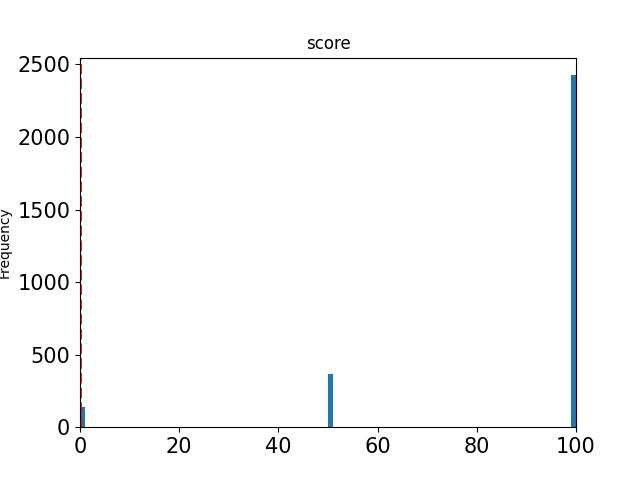
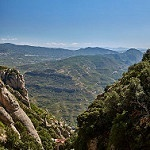
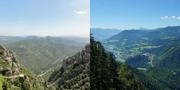
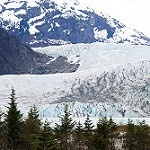
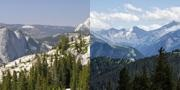
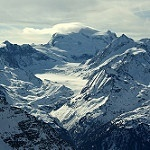
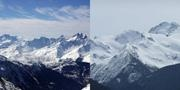
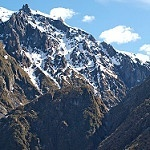
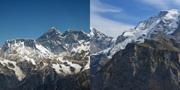
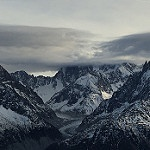
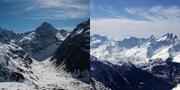
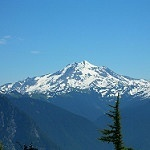
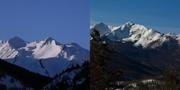
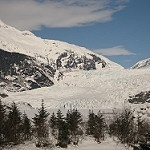
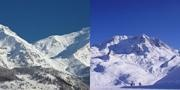
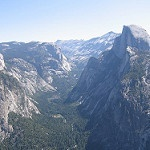
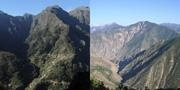
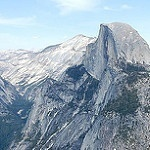
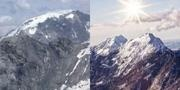
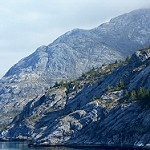
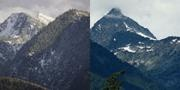
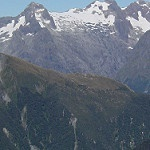
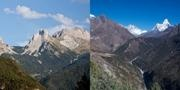
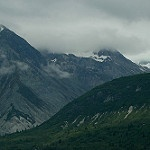
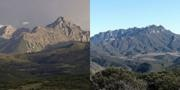
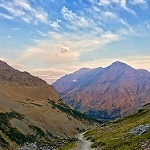
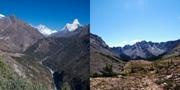
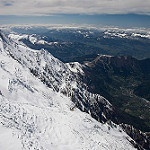
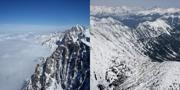
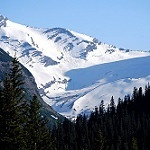
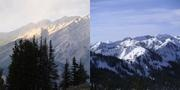
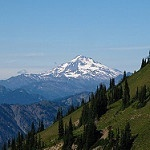
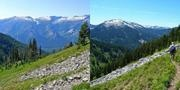
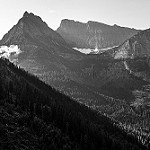
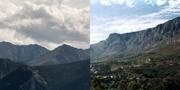
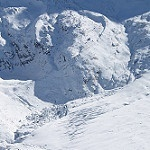
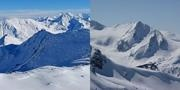
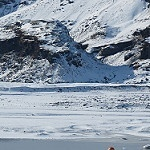
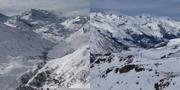
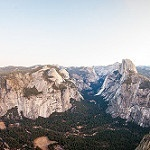
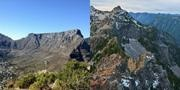

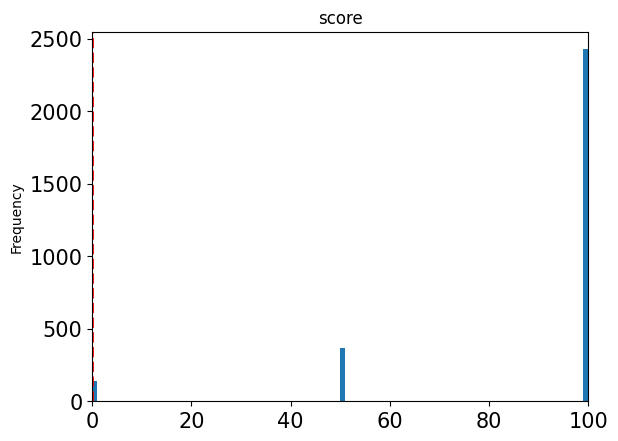

In [31]:
df = fastdup.create_similarity_gallery(similarity_file="scene_classification_clean/report/similarity.csv", save_path="scene_classification_clean/report/", 
                                  get_label_func=lambda x: x.split('/')[-2], get_reformat_filename_func=lambda x: os.path.basename(x),
                                  num_images=20, max_width=180, slice='label_score', descending=False)
HTML('./scene_classification_clean/report/topk_similarity.html')

In [38]:
fastdup.delete_or_retag_stats_outliers(stats_file=df, metric='score', filename_col='from', lower_threshold=51, dry_run=False, how='delete')

Going to delete any images with score < 51
total deleted 508 files


0

## 🚰 Data Leakage

In [ ]:
fastdup.run(input_dir='scene_classification/data/train_set/', work_dir="scene_classification/report/train_valid/", test_dir='scene_classification/data/valid_set/')

In [ ]:
fastdup.create_duplicates_gallery('scene_classification/report/train_valid/similarity.csv', save_path='scene_classification/report/train_valid/', num_images=5, max_width=400)
HTML('scene_classification/report/train_valid/similarity.html')